<a href="https://colab.research.google.com/github/hllibrkaya/airbnb-nyc-visualization/blob/main/house_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [4]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Observation

In [6]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
data = dataset.copy()

In [7]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [8]:
print(f"Shape {data.shape}\n"
f"Size: {data.size}\n"
f"Dimension: {data.ndim}")

Shape (34857, 21)
Size: 731997
Dimension: 2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# EDA

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


*The process of creating two separate columns named Month and Year from the Date column.*

In [11]:
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')

In [12]:
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year

In [13]:
data.drop("Date", axis=1, inplace=True)

 *Removing rows that has more than 10 empty values in it*

In [14]:
data.dropna(thresh=10, inplace=True)

*Observing duplicate lines*

In [15]:
data.duplicated().sum()

26

In [16]:
data.loc[data.duplicated(keep=False),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
2212,Brunswick,8/2 Pottery Ct,3,t,641000.0,SP,RW,5.2,3056.0,3.0,...,0.0,112.0,1900.0,Moreland City Council,-37.77030,144.95330,Northern Metropolitan,11918.0,5,2016
2260,Brunswick,8/2 Pottery Ct,3,t,641000.0,SP,RW,5.2,3056.0,3.0,...,0.0,112.0,1900.0,Moreland City Council,-37.77030,144.95330,Northern Metropolitan,11918.0,5,2016
2663,Camberwell,3/220 Warrigal Rd,2,u,435000.0,SP,LITTLE,7.8,3124.0,2.0,...,896.0,77.0,1960.0,Boroondara City Council,-37.84790,145.09580,Southern Metropolitan,8920.0,11,2016
2690,Camberwell,3/220 Warrigal Rd,2,u,435000.0,SP,LITTLE,7.8,3124.0,2.0,...,896.0,77.0,1960.0,Boroondara City Council,-37.84790,145.09580,Southern Metropolitan,8920.0,11,2016
5777,Kensington,106/80 Speakmen St,1,u,312000.0,SP,Edward,4.2,3031.0,NaN,...,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,5263.0,8,2016
5833,Kensington,106/80 Speakmen St,1,u,312000.0,SP,Edward,4.2,3031.0,NaN,...,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,5263.0,8,2016
6111,Kew East,36 Belford Rd,4,h,1315000.0,SP,Nelson,7.5,3102.0,4.0,...,458.0,200.0,1930.0,Boroondara City Council,-37.79810,145.04720,Southern Metropolitan,2671.0,9,2016
6127,Kew East,36 Belford Rd,4,h,1315000.0,SP,Nelson,7.5,3102.0,4.0,...,458.0,200.0,1930.0,Boroondara City Council,-37.79810,145.04720,Southern Metropolitan,2671.0,9,2016
7620,Pascoe Vale,2 Hazel Gr,2,h,915000.0,S,New,9.9,3044.0,2.0,...,629.0,NaN,1975.0,Moreland City Council,-37.73120,144.93990,Northern Metropolitan,7485.0,12,2016
7661,Pascoe Vale,2 Hazel Gr,2,h,915000.0,S,New,9.9,3044.0,2.0,...,629.0,NaN,1975.0,Moreland City Council,-37.73120,144.93990,Northern Metropolitan,7485.0,12,2016


In [17]:
data = data.drop_duplicates()

*Examining the number of unique values in columns will assist in identifying categorical values*

In [18]:
data.nunique()

Suburb             350
Address          34008
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
Month               12
Year                 3
dtype: int64

In [19]:
numeric = ["Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea","Distance","Rooms", "YearBuilt", "Lattitude", "Longtitude","Propertycount"]


In [20]:
categorical = ["CouncilArea","Regionname","Type","Method"]

*Outlier detection*

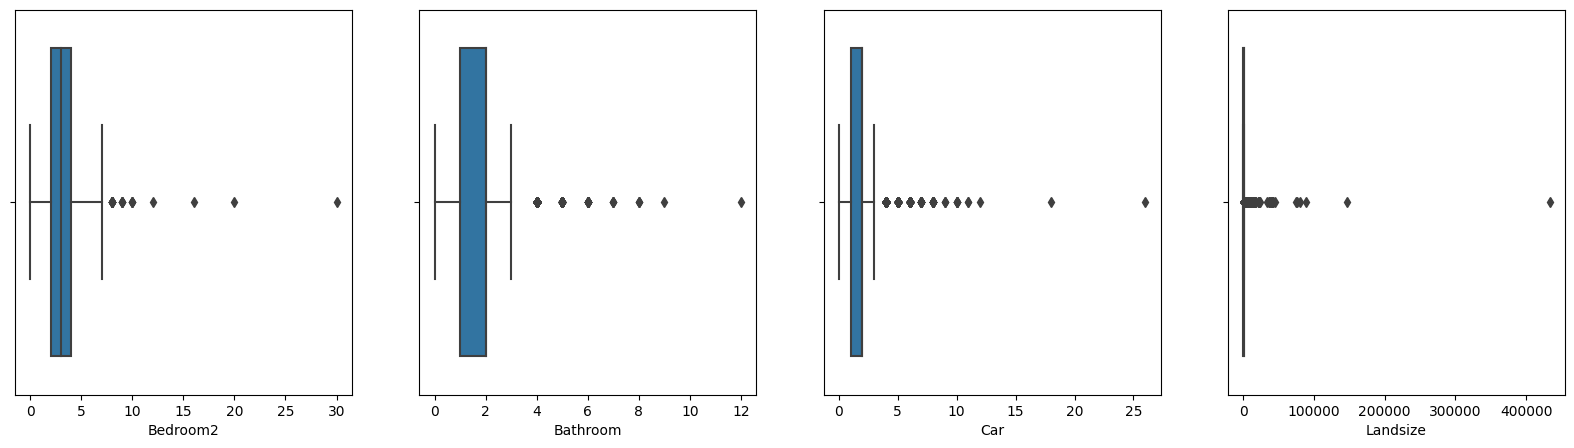

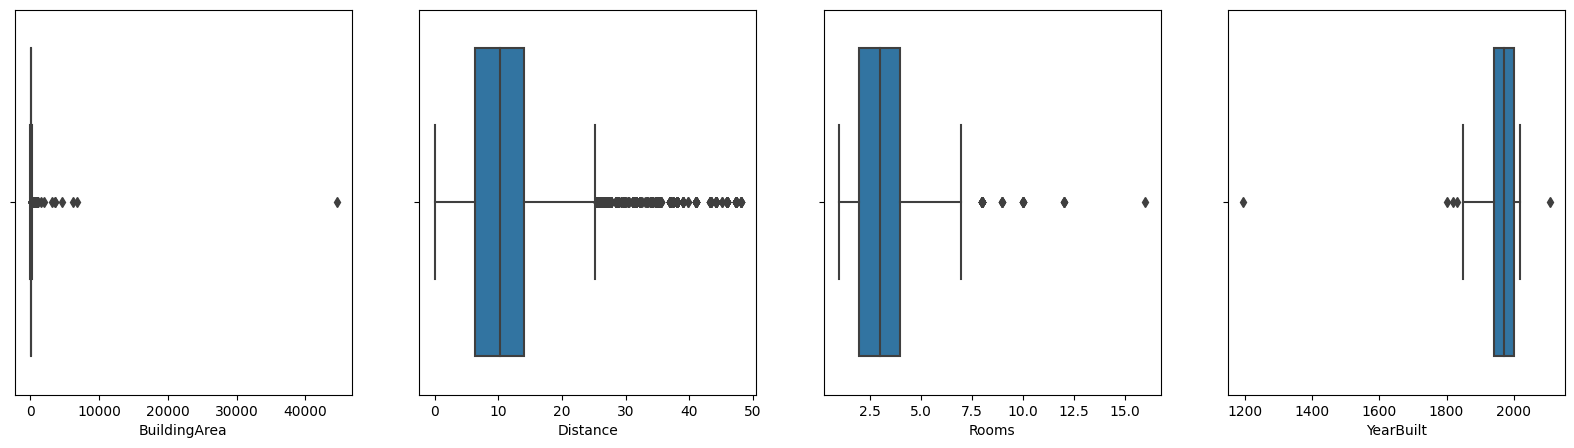

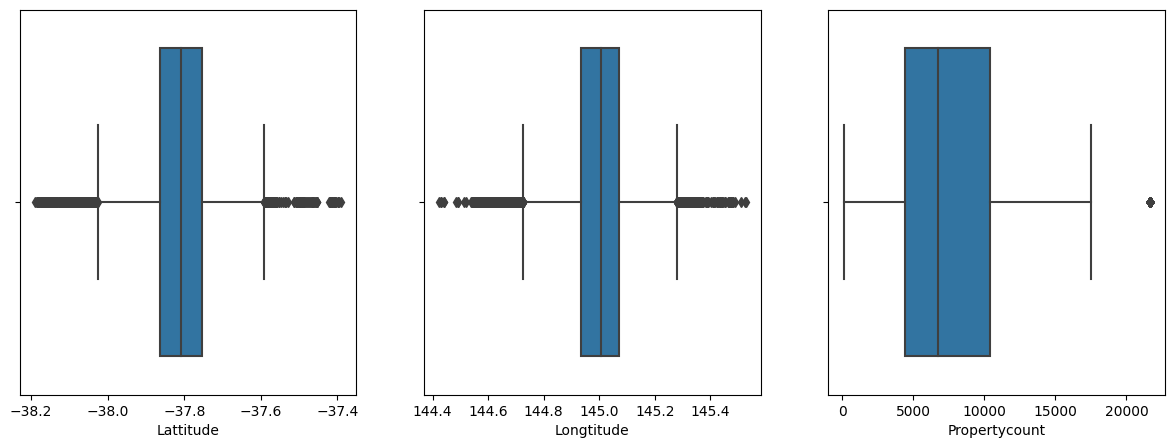

In [21]:
for i in range(0, len(numeric), 4):
    plt.figure(figsize=(20, 5))
    for j in range(4):
        if i + j < len(numeric):
            plt.subplot(1, 4, j + 1)
            sns.boxplot(data=data, x=numeric[i + j])
    plt.show()

In [22]:
def z_score_outliers(data,col,threshold = 5):
  mean = data[col].mean()
  std = data[col].std()
  zscores = (data[col] - mean) / std
  outliers = data[col][np.abs(zscores) > threshold]
  data.loc[outliers.index, col] = mean
  return len(outliers)

In [23]:
for col in numeric:
  n_outliers = z_score_outliers(data, col)
  print(f' There were {n_outliers} in {col} column')

 There were 26 in Bedroom2 column
 There were 25 in Bathroom column
 There were 62 in Car column
 There were 23 in Landsize column
 There were 7 in BuildingArea column
 There were 68 in Distance column
 There were 33 in Rooms column
 There were 1 in YearBuilt column
 There were 0 in Lattitude column
 There were 0 in Longtitude column
 There were 0 in Propertycount column


There are too much missing values on BuildingArea,YearBuilt and Landsize columns
Verisetinin yarısından fazlasında bu değerler yok, bunları ilerde kaldırmak daha doğru geliyor bu yüzden

In [24]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7604
Method               0
SellerG              0
Distance             0
Postcode             0
Bedroom2          8212
Bathroom          8221
Car               8723
Landsize         11800
BuildingArea     21102
YearBuilt        19294
CouncilArea          2
Lattitude         7971
Longtitude        7971
Regionname           2
Propertycount        2
Month                0
Year                 0
dtype: int64

**Boş değerleri doldurmak**, Numeric olanları ortalama ile categorik olanları da en çok tekrar eden değer ile doldurdum

In [25]:
for column in numeric:
  data[column] = data[column].fillna(data[column].mean())

In [26]:
for column in categorical:
  data[column] = data[column].fillna(data[column].mode().iloc[0])

*I will deal with price column later*

# Data Visualization

Text(0.5, 0, 'Price')

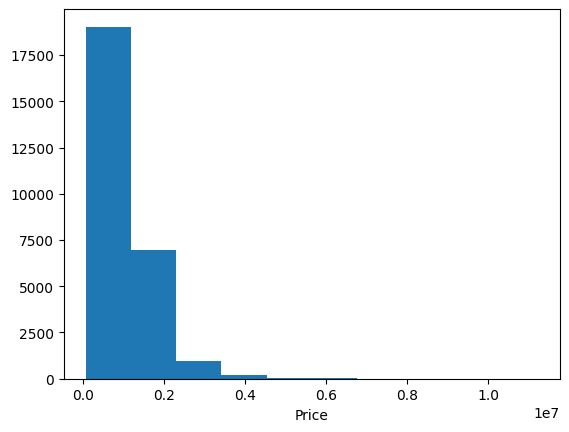

In [27]:
plt.hist(data["Price"])
plt.xlabel("Price")

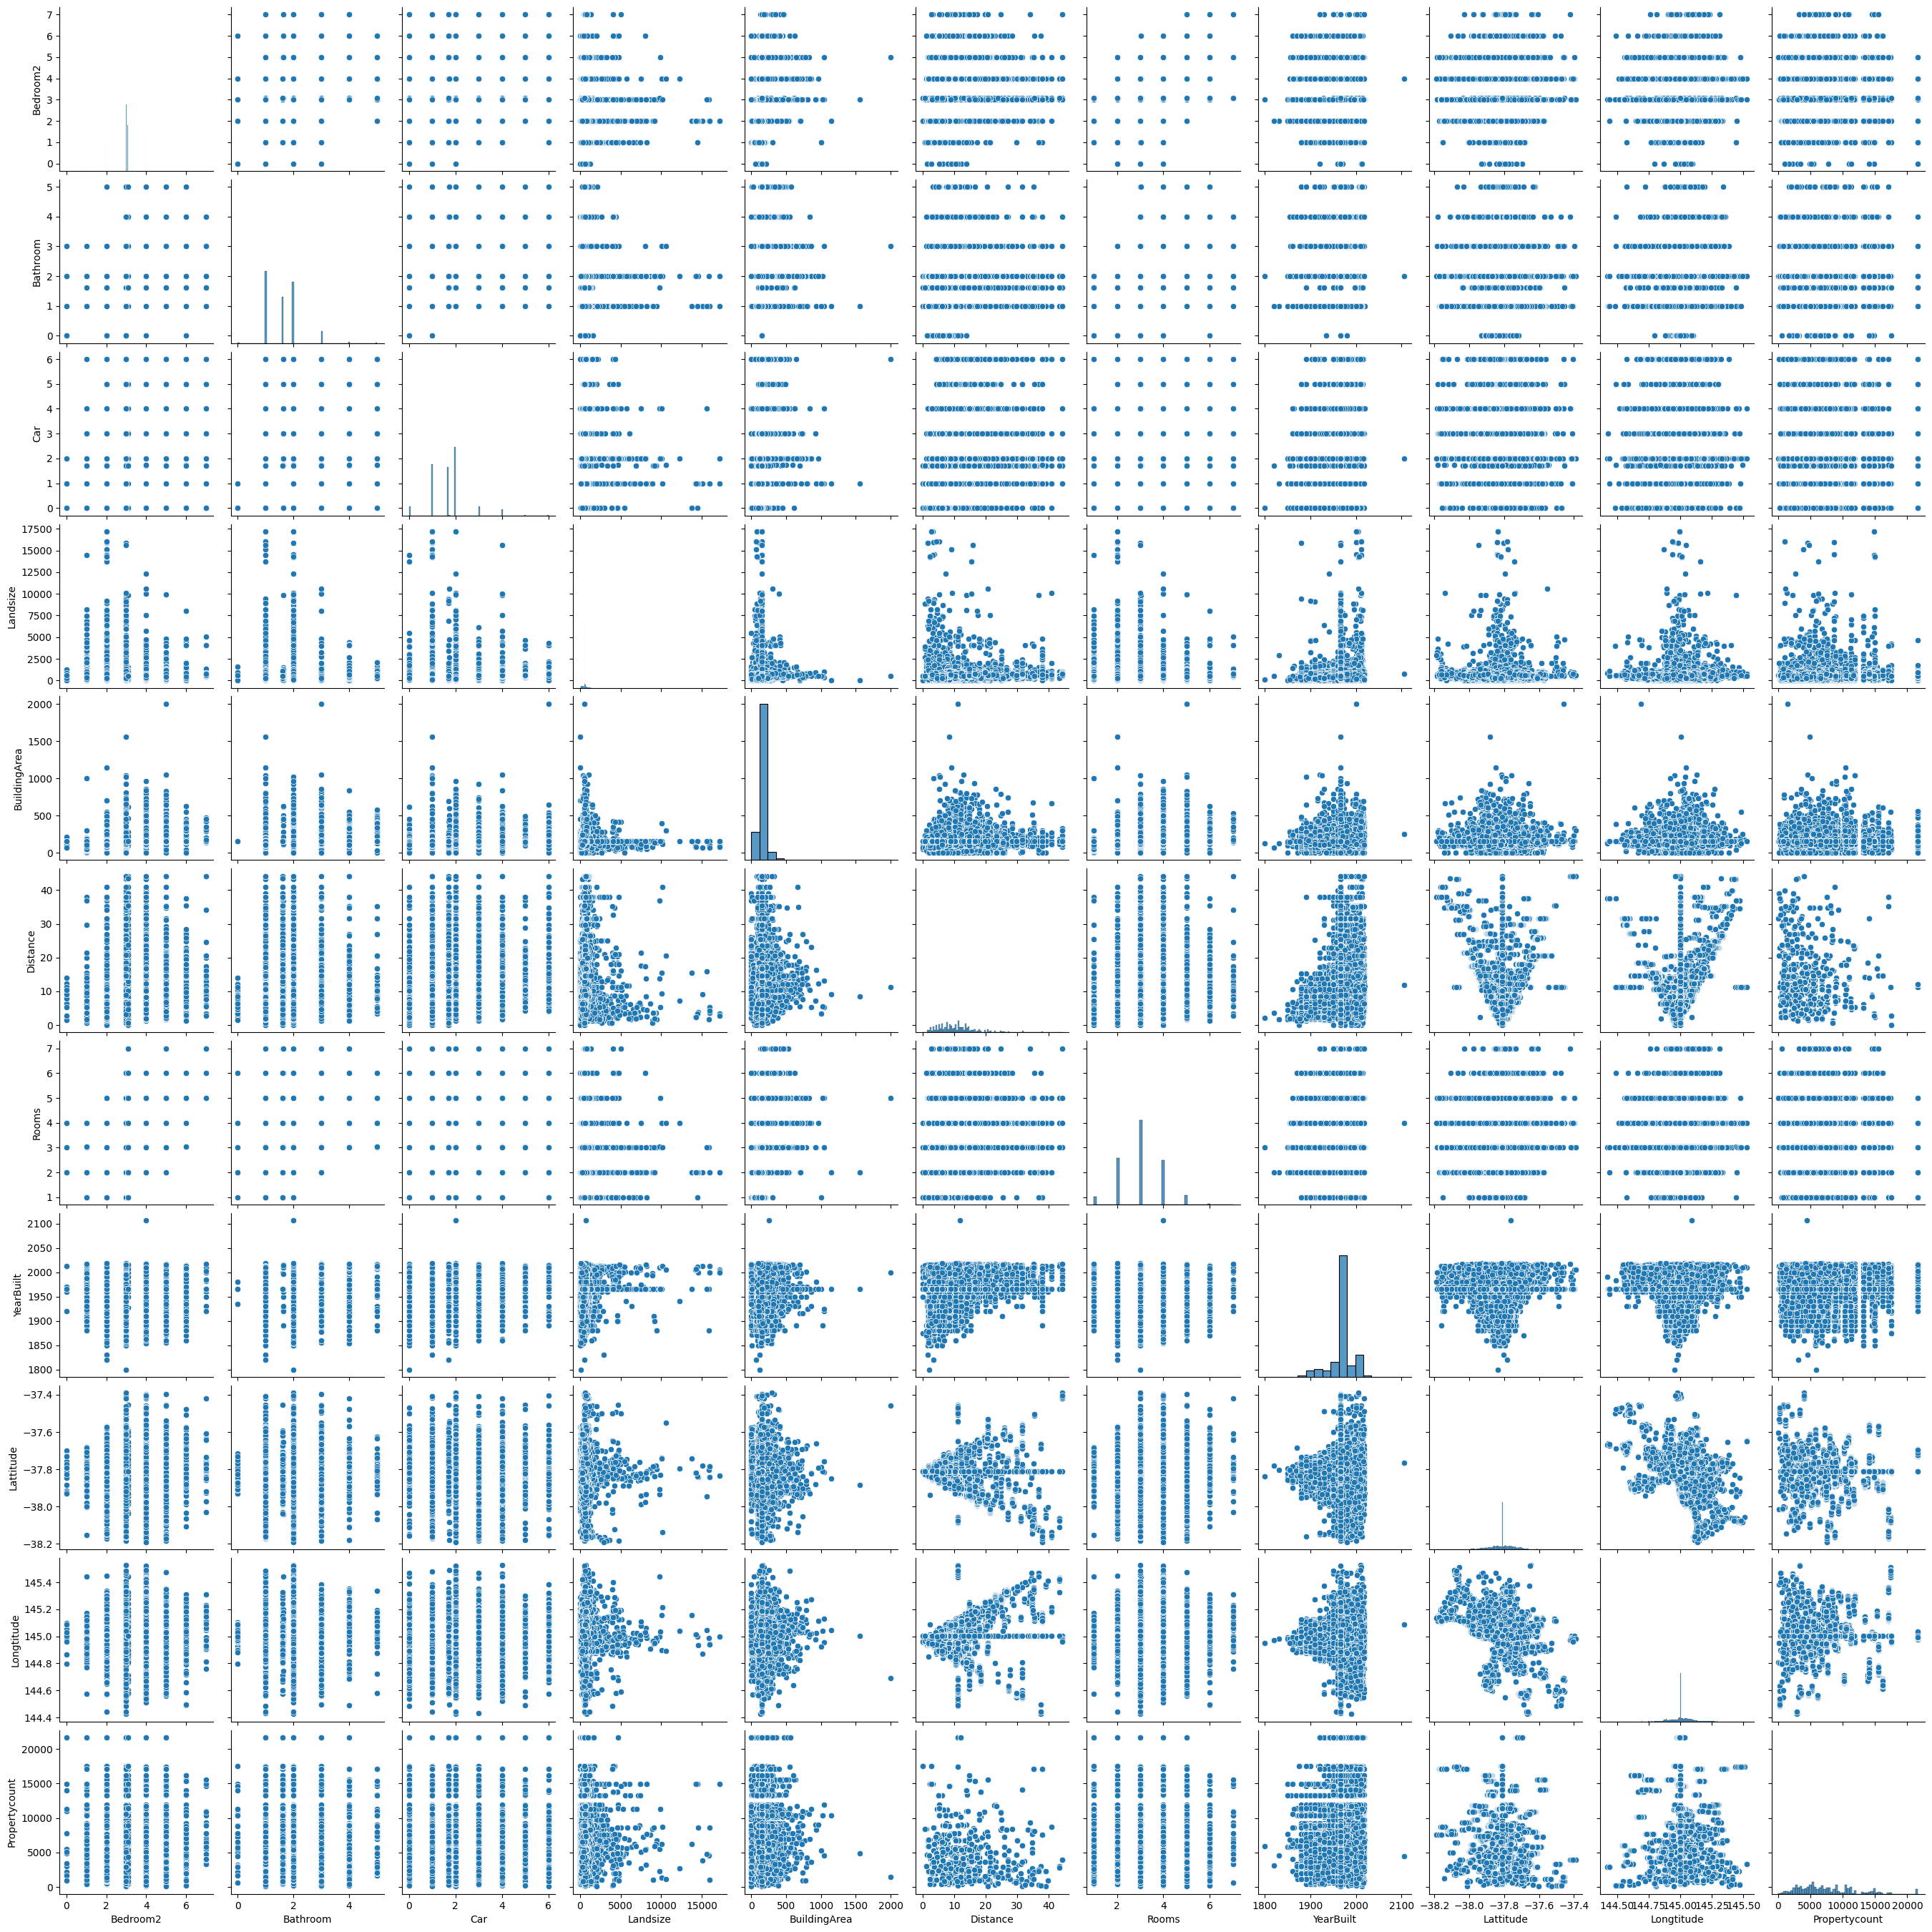

In [28]:
sns.pairplot(data, vars=numeric)

<ipython-input-29-e25f363455a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, linewidths=0.7)


<Axes: >

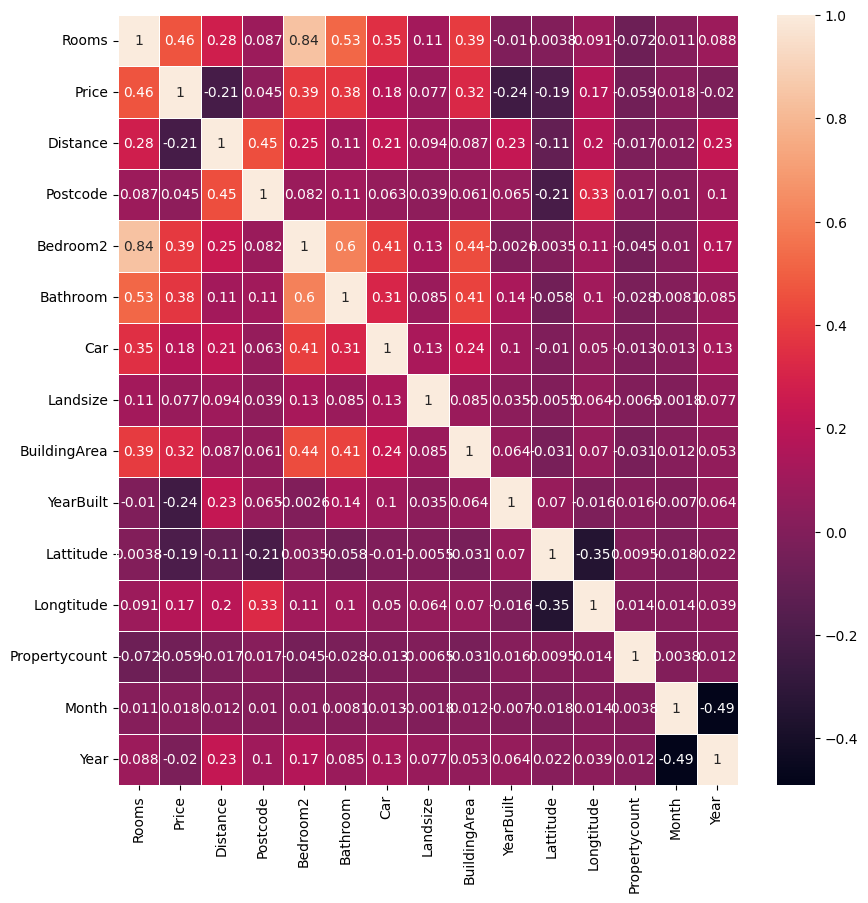

In [29]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True, linewidths=0.7)

*Converting categorical data into numeric data using one-hot encoder*

In [30]:
categorical= ["Type","CouncilArea","Regionname","Method","Suburb"]

In [31]:
for col in categorical:
  one_hot = pd.get_dummies(data[col], prefix=col)
  data = pd.concat([data.drop(col, axis=1), one_hot], axis=1)

* Removing the Address and SellerG columns from the dataset*



In [32]:
data.drop(["Address","SellerG"],axis=1, inplace=True)

 *Since missing price values occupy 1/5th of the dataset, filling them would have a negative impact on the model's performance, so it's better to remove them.
Note: Ideally, these can be separated as test data, but then we won't be able to perform performance evaluation*

In [33]:
#data["Price"].fillna(data["Price"].mean(),inplace=True)
data = data[data['Price'].notna()]

* Example of separating empty rows as test data*

```
test = data[data["Price"].isnull()]
test.reset_index(drop=True,inplace=True)
train = data[~data["Price"].isnull()]
X_train = train.drop("Price",axis=1)
y_train = train["Price"]
X_test = test.drop("Price",axis=1)
y_test = test["Price"]
```



*Applying a logarithmic transformation to price values, as they are very large, can improve the performance of the models*

In [34]:
data["Price"] = np.log1p(data["Price"])

# *Train-test split*

*Some models, like KNN, perform better with scaling, and the decrease in performance in other models is negligible*

In [35]:
scaler = StandardScaler()

In [36]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [37]:
X = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# *Model Selection*

In [39]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}


## Cross-validation

In [40]:
for model_name, model_info in models.items():
  model = model_info['model']
  model_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
  print(f"Model: {model_name}\t Cross-Validation R2 Score:{model_scores.mean()}")

Model: Lasso	 Cross-Validation R2 Score:-0.00037940124055344524
Model: LinearRegression	 Cross-Validation R2 Score:-9.97786260171391e+25
Model: Ridge	 Cross-Validation R2 Score:0.7884485649306521
Model: ElasticNet	 Cross-Validation R2 Score:-0.00037940124055344524
Model: KNeighborsRegressor	 Cross-Validation R2 Score:0.7362564554734558
Model: RandomForestRegressor	 Cross-Validation R2 Score:0.838502031891753
Model: GradientBoostingRegressor	 Cross-Validation R2 Score:0.8128498699632773
Model: AdaBoostRegressor	 Cross-Validation R2 Score:0.6140365274259576


*Since the model that performs the best according to the R2 score is Random Forest, this model will be selected and trained*

## Hyper-parameter optimization

In [41]:
model = RandomForestRegressor()

In [42]:
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
random_search = RandomizedSearchCV(model, param_distributions=parameters, n_iter=15, cv=5)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}


# Performance evaluation

In [44]:
model = RandomForestRegressor(n_estimators = 200, min_samples_split= 5, min_samples_leaf= 4, max_depth= None)

In [45]:
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=5, n_estimators=200)

In [46]:
y_pred = model.predict(X_test)

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [48]:
print(f"MAE: {mae}\n"
      f"MSE: {mse}\n"
      f"RMSE: {rmse}\n"
      f"R2: {r2}")

MAE: 0.14605331084753992
MSE: 0.040159588842946056
RMSE: 0.20039857495238347
R2: 0.8522852841285007
